In [1]:
# Intro to deep neural networks

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## General supervised learning

- dataset $(x_i, y_i), i=1\ldots N$
- $x_i \in R^p$ are samples
- $y_i$ are discrete labels

build some predictor $\hat y_i = f_\theta(x)$

## some toy dataset with two classes for illustration

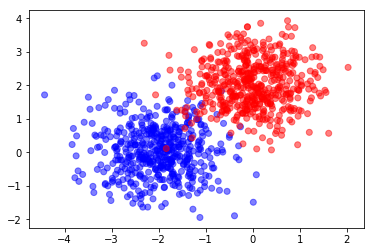

In [6]:
from talk_utils import create_lin_data, create_nonlin_data
X,y = create_nonlin_data(500)
X,y = create_lin_data(500)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap=plt.cm.bwr);

## Logistic regression
most simple linear classifier
- $p_i = \sigma(W x_i + b$)
- $y_i \sim Bernoulli(p_i)$

linear decision boundary in input space


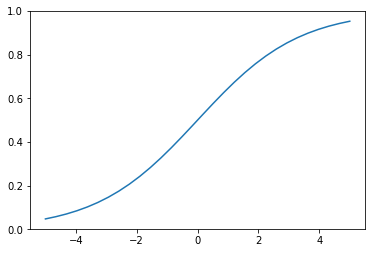

In [39]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def logreg(x, W, b):
    return sigmoid(x@W + b)

plt.plot(np.linspace(-5,5,30), sigmoid(np.linspace(-3,3,30)))


## a simple 2D example

In [49]:
logreg(np.array([1,2]).reshape(1,2), W,b)

array([[ 0.81757448]])

In [144]:
def plot_2d_logreg(W,b):
    x_range = np.linspace(-4,4,20)
    y_range = np.linspace(-4,4,20)
    P = np.zeros((20,20))
    for i,ii in enumerate(y_range):
        for j,jj in enumerate(x_range):
            P[i,j] = logreg(np.array([ii,jj]).reshape(1,2), W,b)
    plt.figure(figsize=(5,5))
#     plt.subplot(121)
    plt.pcolor(x_range, y_range, P, cmap=plt.cm.bwr)
    plt.colorbar()
    plt.xlabel('x1')
    plt.ylabel('x2')
#     plt.subplot(122)
#     plt.pcolor(x_range, y_range, P > 0.5,cmap=plt.cm.bwr)
#     plt.xlabel('x1')
#     plt.ylabel('x2')

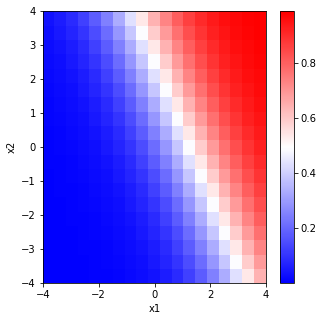

In [145]:
W = np.array([[0.5, 1]]).T
b = np.array(-1).reshape(1,-1)

plot_2d_logreg(W,b)

## fitting the model to the data
- minimize a **loss function** $L(\theta)$ 
    - likelihood of the data under the model: $like(X,y| \theta) = \prod_{i=1\ldots N} p_i^{y_i} \cdot (1-p_i)^{1-y_i}$
    - log likelihood: $loglike(X,y| \theta) = \sum_{i=1\ldots N} y_i \log(p_i) +  (1-y_i) \log(1-p_i)$
    - turns out that this is (up to sign) the same as the *cross entropy loss*
- minimization via **gradient descend**:
    - $\theta_{t+1} := \theta_{t} + \eta \cdot \partial_\theta L(\theta)$
    
- for our log.regression example:
    - $\partial_W L(W,b) = \sum_{i=1\ldots N} y_i \cdot (1-p_i) \cdot \partial_W (W x_i+b) + (1-y_i) \cdot p_i \cdot (-1) \cdot\partial_W (W x_i+b)$
    - $\partial_W L(W,b) = \sum_{i=1\ldots N} y_i \cdot (1-p_i) \cdot x_i - (1-y_i) \cdot p_i \cdot x_i$
    - using $\partial_x \sigma(x) = \sigma(x) \cdot (1- \sigma(x))$
    
    - analogous: $\partial_b L(W,b) = \sum_{i=1\ldots N} y_i \cdot (1-p_i) - (1-y_i) \cdot p_i$

In [105]:
def logreg_gradW(x,y,W,b):
    p = logreg(x, W, b)
    
    gradients=[]
    for i in range(len(y)):
        gradients.append(y[i]*(1-p[i])*x[i] - (1-y[i])*p[i] *x[i])
        # gradient = np.sum(y.reshape(-1,1)*(1-p)*x - (1-y.reshape(-1,1))*p *x, 0)
    gradients = np.stack(gradients).sum(0,keepdims=True ).T
    return gradients

def logreg_gradb(x,y,W,b):
    p = logreg(x, W, b)
    
    gradients=[]
    for i in range(len(y)):
        gradients.append(y[i]*(1-p[i]) - (1-y[i])*p[i])
        # gradient = np.sum(y.reshape(-1,1)*(1-p)*x - (1-y.reshape(-1,1))*p *x, 0)
    gradients = np.stack(gradients).sum(0,keepdims=True ).T
    return gradients

In [162]:
W0 = np.array([[5],[-5]])
b0 = np.array([0])
eta = 0.001
W_list = [W0]
b_list = [b0]
for i in range(200):
    Wold = W_list[-1]
    bold = b_list[-1]
    Wnew = Wold + eta*logreg_gradW(X,y,Wold, bold )
    bnew = bold + eta*logreg_gradb(X,y,Wold, bold )
    W_list.append(Wnew)
    b_list.append(bnew)

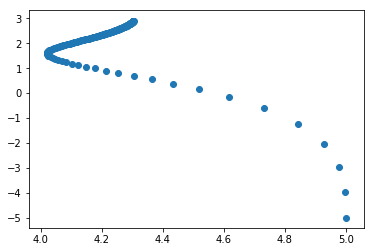

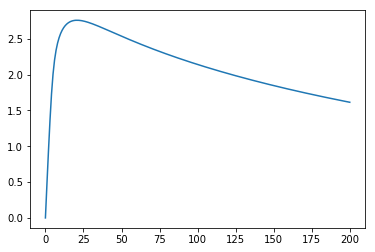

In [163]:
W_list = np.stack(W_list)[:,:,0]
plt.scatter(W_list[:,0], W_list[:,1])
plt.figure()
plt.plot(b_list)

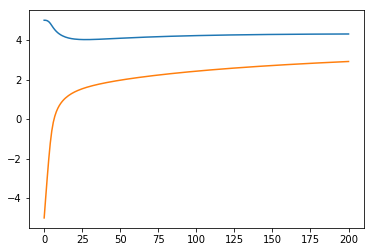

In [164]:
plt.plot(W_list[:,0])
plt.plot(W_list[:,1])

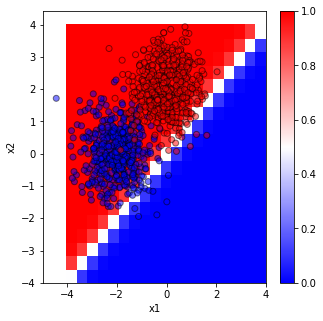

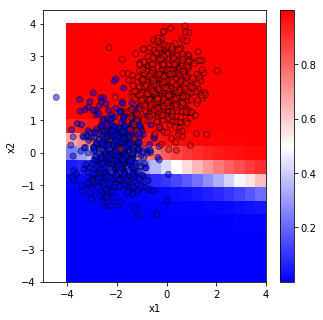

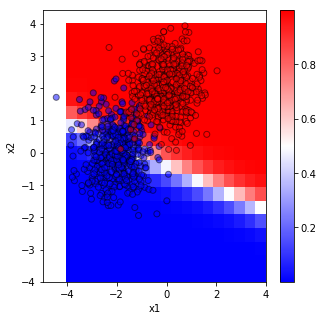

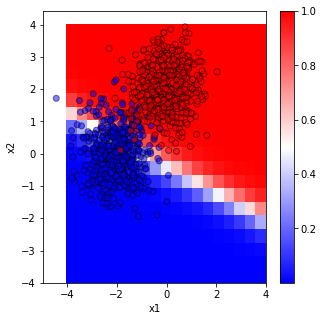

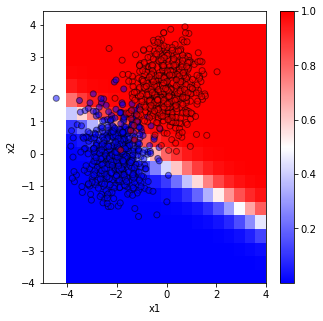

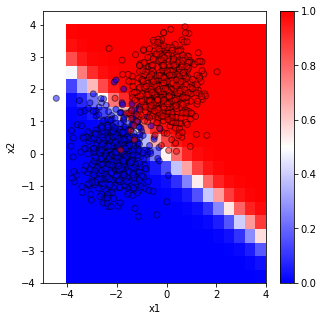

In [165]:
for i in [0,10,20,30,40,-1]:
    plt.figure()
    plot_2d_logreg(W_list[i],b_list[i])
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap=plt.cm.bwr, edgecolors='k');

In [ ]:
# conda create --name py36_keras anaconda python=3.6
# source activate py36_keras
# pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.3.0-cp36-cp36m-linux_x86_64.whl
# https://www.tensorflow.org/install/
# pip install keras
